In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
sentiment_data = pd.read_csv("/content/drive/MyDrive/ds_dhananjay/needed/csv_files/fear_greed_index.csv")
trader_data = pd.read_csv('/content/drive/MyDrive/ds_dhananjay/needed/csv_files/historical_data.csv')

In [4]:
sentiment_data.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [5]:
trader_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [6]:
sentiment_data.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [7]:
trader_data.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [8]:
sentiment_data.columns = sentiment_data.columns.str.strip().str.lower().str.replace(" ", "_")
trader_data.columns = trader_data.columns.str.strip().str.lower().str.replace(" ", "_")

In [9]:
# data cleaning
sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'], unit='s', errors='coerce')
sentiment_data['date'] = pd.to_datetime(sentiment_data['date'], errors='coerce')
sentiment_data['value'] = pd.to_numeric(sentiment_data['value'], errors='coerce')
sentiment_data['classification'] = sentiment_data['classification'].str.strip().str.title()
sentiment_data.dropna(subset=['date'], inplace=True)

In [10]:
trader_data['timestamp_ist'] = pd.to_datetime(trader_data['timestamp_ist'], errors='coerce')
trader_data['timestamp'] = pd.to_datetime(trader_data['timestamp'], errors='coerce')
trader_data.dropna(subset=['timestamp_ist'], inplace=True)

In [11]:
num_cols = trader_data.select_dtypes(include=np.number).columns
trader_data[num_cols] = trader_data[num_cols].fillna(0)
for col in num_cols:
    trader_data[col] = pd.to_numeric(trader_data[col], errors='coerce')

sentiment_data.reset_index(drop=True, inplace=True)
trader_data.reset_index(drop=True, inplace=True)

In [12]:
sentiment_data.head()

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


In [13]:
trader_data.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-02-12 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-02-12 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-02-12 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-02-12 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-02-12 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50


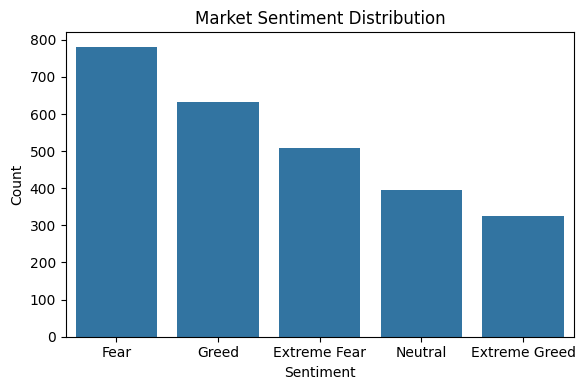

In [15]:
#EDA
import os
os.makedirs("outputs", exist_ok=True)

plt.figure(figsize=(6,4))
sns.countplot(data=sentiment_data, x='classification', order=sentiment_data['classification'].value_counts().index)
plt.title("Market Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ds_dhananjay/needed/outputs/sentiment_distribution.png")
plt.show()

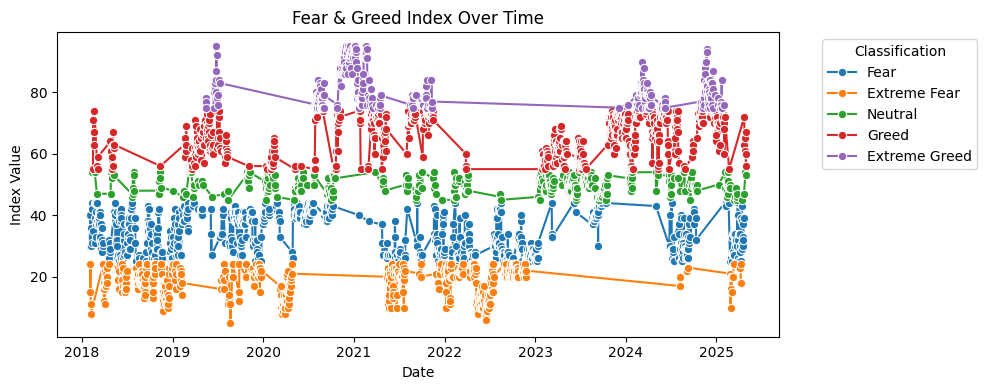

In [16]:
plt.figure(figsize=(10,4))
sns.lineplot(data=sentiment_data, x='date', y='value', hue='classification', marker="o")
plt.title("Fear & Greed Index Over Time")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend(title="Classification", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ds_dhananjay/needed/outputs/fear_greed_over_time.png")
plt.show()

In [17]:
trader_data['date'] = trader_data['timestamp_ist'].dt.date
sentiment_data['date_only'] = sentiment_data['date'].dt.date
merged_df = pd.merge(trader_data, sentiment_data, left_on='date', right_on='date_only', how='inner')

/tmp/ipython-input-3087564265.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=merged_df, x='classification', y='closed_pnl', estimator='mean', ci=None)


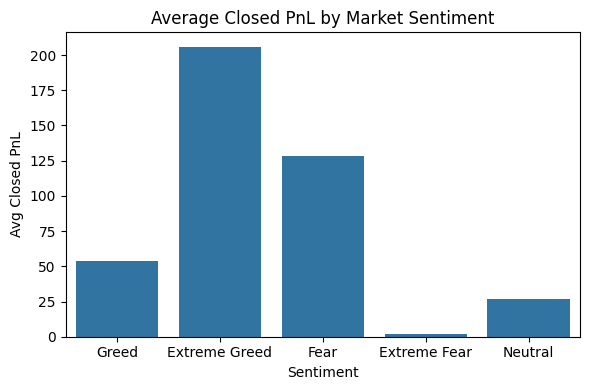

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(data=merged_df, x='classification', y='closed_pnl', estimator='mean', ci=None)
plt.title("Average Closed PnL by Market Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Avg Closed PnL")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ds_dhananjay/needed/outputs/avg_pnl_by_sentiment.png")
plt.show()


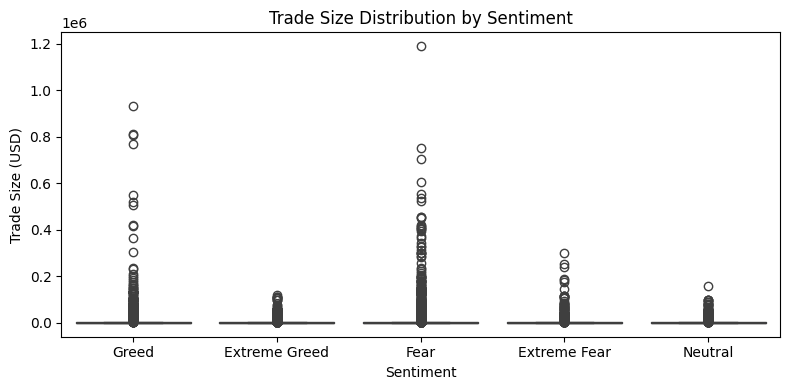

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(data=merged_df, x='classification', y='size_usd')
plt.title("Trade Size Distribution by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Trade Size (USD)")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ds_dhananjay/needed/outputs/trade_size_by_sentiment.png")
plt.show()

In [20]:
# Average Closed PnL by sentiment
avg_pnl = (
    merged_df.groupby('classification')['closed_pnl']
    .mean()
    .reset_index()
    .rename(columns={'closed_pnl': 'avg_closed_pnl'})
)

# Average trade size USD by sentiment
avg_size = (
    merged_df.groupby('classification')['size_usd']
    .mean()
    .reset_index()
    .rename(columns={'size_usd': 'avg_trade_size_usd'})
)

# Win rate by sentiment
win_rate = (
    merged_df.groupby('classification')
    .apply(lambda x: (x['closed_pnl'] > 0).mean() * 100)
    .reset_index(name='win_rate_percent')
)

# Merge all insights into one table
summary_table = avg_pnl.merge(avg_size, on='classification').merge(win_rate, on='classification')

print(summary_table)


  classification  avg_closed_pnl  avg_trade_size_usd  win_rate_percent
0   Extreme Fear        1.891632         4118.761840         29.277730
1  Extreme Greed      205.816345         3242.085086         55.328233
2           Fear      128.287950         5744.782685         38.178672
3          Greed       53.988003         5051.878829         43.570670
4        Neutral       27.088803         4332.202906         49.492017


/tmp/ipython-input-2054118582.py:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['closed_pnl'] > 0).mean() * 100)


/tmp/ipython-input-2105078130.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_pnl, x='classification', y='avg_closed_pnl', palette='viridis')


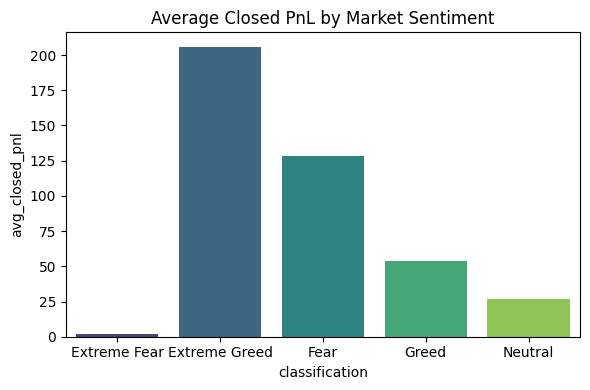

/tmp/ipython-input-2105078130.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_size, x='classification', y='avg_trade_size_usd', palette='magma')


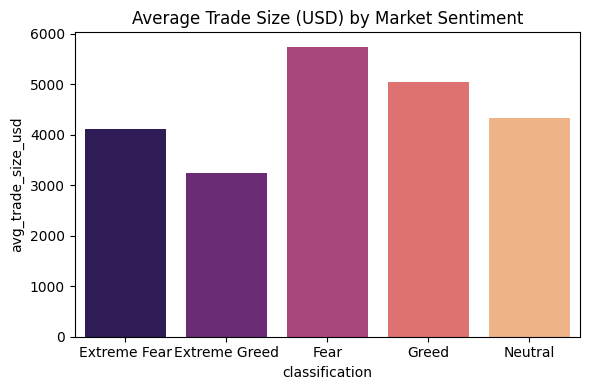

/tmp/ipython-input-2105078130.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=win_rate, x='classification', y='win_rate_percent', palette='coolwarm')


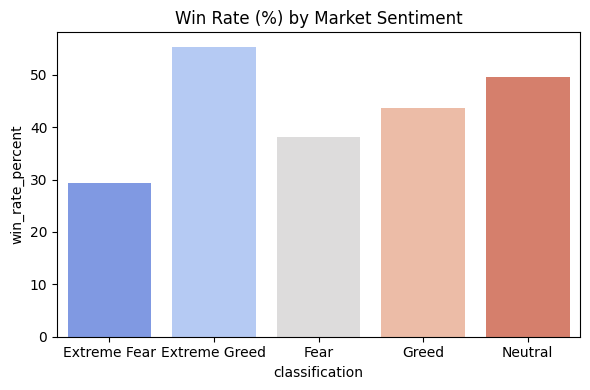

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("outputs", exist_ok=True)

# Avg PnL by sentiment
plt.figure(figsize=(6,4))
sns.barplot(data=avg_pnl, x='classification', y='avg_closed_pnl', palette='viridis')
plt.title("Average Closed PnL by Market Sentiment")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ds_dhananjay/needed/outputs/avg_pnl_by_sentiment.png")
plt.show()

# Avg trade size by sentiment
plt.figure(figsize=(6,4))
sns.barplot(data=avg_size, x='classification', y='avg_trade_size_usd', palette='magma')
plt.title("Average Trade Size (USD) by Market Sentiment")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ds_dhananjay/needed/outputs/avg_trade_size_by_sentiment.png")
plt.show()

# Win rate by sentiment
plt.figure(figsize=(6,4))
sns.barplot(data=win_rate, x='classification', y='win_rate_percent', palette='coolwarm')
plt.title("Win Rate (%) by Market Sentiment")
plt.tight_layout()
plt.savefig("/content/drive/MyDrive/ds_dhananjay/needed/outputs/win_rate_by_sentiment.png")
plt.show()
